### Utils

In [1]:
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sql.connect("../railcar-results-2025-11-26-1764209912/metrics.db")
hb = pd.read_sql("select * from heartbeat", conn)
projects = [
    "angular",
    "canvg",
    "fast-xml-parser",
    "jimp",
    "jpeg-js",
    "js-yaml",
    "lit",
    "lodash",
    "pako",
    "protobufjs",
    "redux",
    "sharp",
    "tslib",
    "turf",
    "typescript",
    "ua-parser-js",
    "xml2js",
    "xmldom",
]

OperationalError: unable to open database file

In [220]:
def get_project_data(project, conn):
    df = pd.read_sql(f"select * from heartbeat where labels like '{project}%'", conn)

    # coverage percentage
    df['covpct'] = df['coverage'] * 100 / df['total_edges']
    
    # split labels into columns
    df = df.join(df['labels'].str.split(",", expand=True).rename(columns={0: "project", 1: "iter", 2: "mode"}))
    df['iter'] = df['iter'].astype(int)
    
    # # TODO: take start times from fuzzer-config.json?
    # # adjust timestamps so they start from 0
    # start_times = { mode: [df[(df['iter'] == x) & (df['mode'] == mode)]['timestamp'].iloc[0] for x in range(iterations)] for mode in modes }
    # start_offsets = df.apply(lambda row: start_times[row['mode']][row['iter']], axis=1)
    # df['timestamp'] = df['timestamp'] - start_offsets
    
    df = df.drop(["labels", "total_edges", "coverage", "valid_corpus", "corpus"], axis=1)
    return df

# Coverage Over Time

(comparison of coverage of our best technique vs bytes mode)

In [221]:
best_mode = "graph"
base_mode = "bytes"

In [222]:
projects = ["fast-xml-parser", "js-yaml", "protobufjs"]
project = "fast-xml-parser"
iterations = 3
modes = ["bytes", "graph"]

In [223]:
def coverage_plot(df):
    for mode in [best_mode, base_mode]:
        tmp = df[df['mode'] == mode].copy()
        tmp['x'] = tmp.groupby('iter')['timestamp'].cumcount() * 15 / 3600
        sns.lineplot(tmp, x='x', y='covpct', label=mode)
    plt.title(project)
    plt.xlabel("Time (hours)")
    plt.ylabel("Coverage %")
    plt.show()

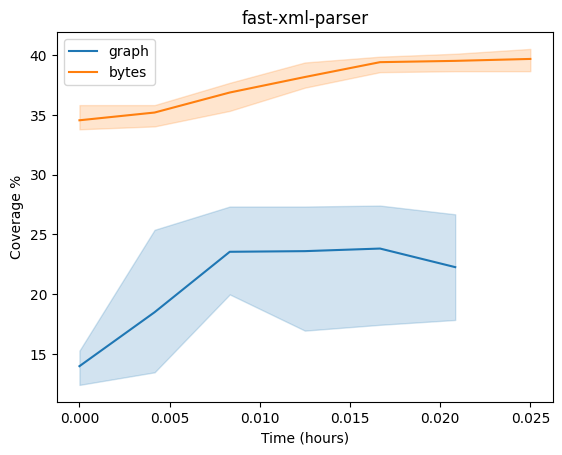

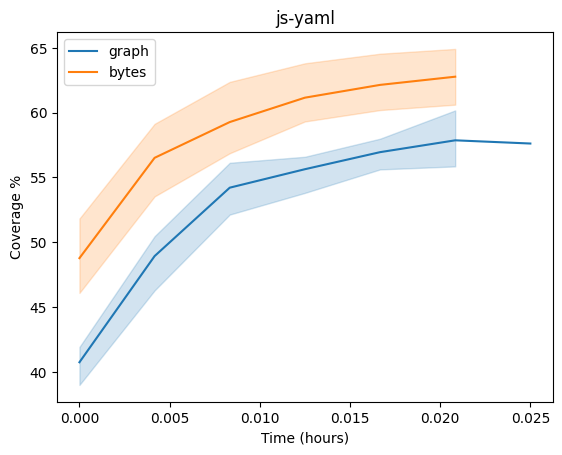

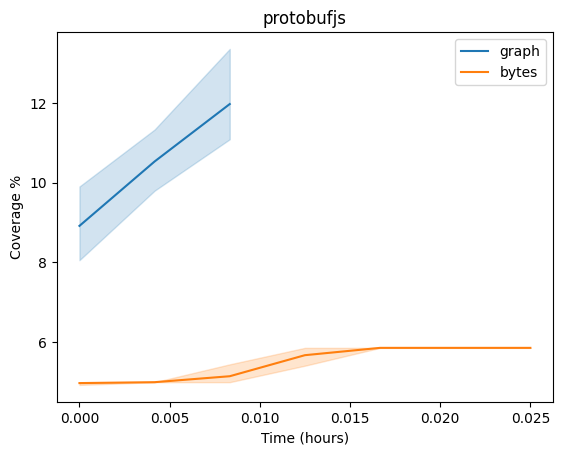

In [224]:
for project in projects:
    df = get_project_data(project, conn)
    coverage_plot(df)